In [71]:
# -*- coding:utf-8 -*-
import pandas as pd
import subprocess
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 数据导入
xls_file = pd.ExcelFile('alliance.xls')
# print(xls_file.sheet_names)
df = xls_file.parse('sheet1')

In [72]:
# 对范畴类变量进行编码
for column in ['(L)HTTPstatus']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns]=dummies

# 去掉已编码的原属性
df.drop(['domain','(L)HTTPstatus'], axis=1, inplace=True)
#df.ix[:,df.columns!=999]

In [73]:
# 拆分数据集为训练集和测试集
# 可调参数 test_size
train, test = train_test_split(df, test_size = 0.2)   # doing split of training and testing
train_data, train_target= train.ix[:, train.columns != 'result'], train['result']
test_data, test_target = test.ix[:, test.columns != 'result'], test['result']
print(train_data.shape)
print(train_target.shape)
#print(train['result'])
print('----------------------------')
#print(test['result'])

(992, 19)
(992,)
----------------------------


In [74]:
# 列出要使用的特征
features = list(train_data.columns)
print(features)

['url_check', 'phantomjs_check', '(L)超链接数量', '(L)外链数量', '(L)有无外部js', '(L)内部js匹配', '(L)外部js匹配', '(L)引用图片数量', '(L)WebKO', '(R)超链接数量', '(R)外链数量', '(R)有无外部js', '(R)内部js匹配', '(R)外部js匹配', '(R)引用图片数量', '(R)WebKO', 200, 404, 500]


In [75]:
# 套入模型
# 可调参数 min_samples_split
dt = DecisionTreeClassifier(min_samples_split=5, random_state=99)
#dt = DecisionTreeClassifier(min_samples_split=200, random_state=99)
clf = dt.fit(train_data,train_target)
score = clf.score(train_data, train_target)
clf_err = 1.0 - score

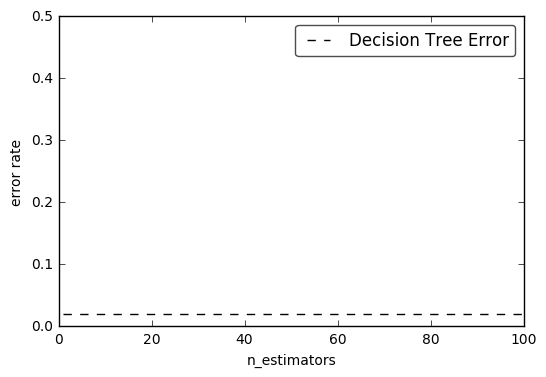

In [76]:
import matplotlib.pyplot as plt
n_estimators = 100

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [clf_err] * 2, 'k--',
        label='Decision Tree Error')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

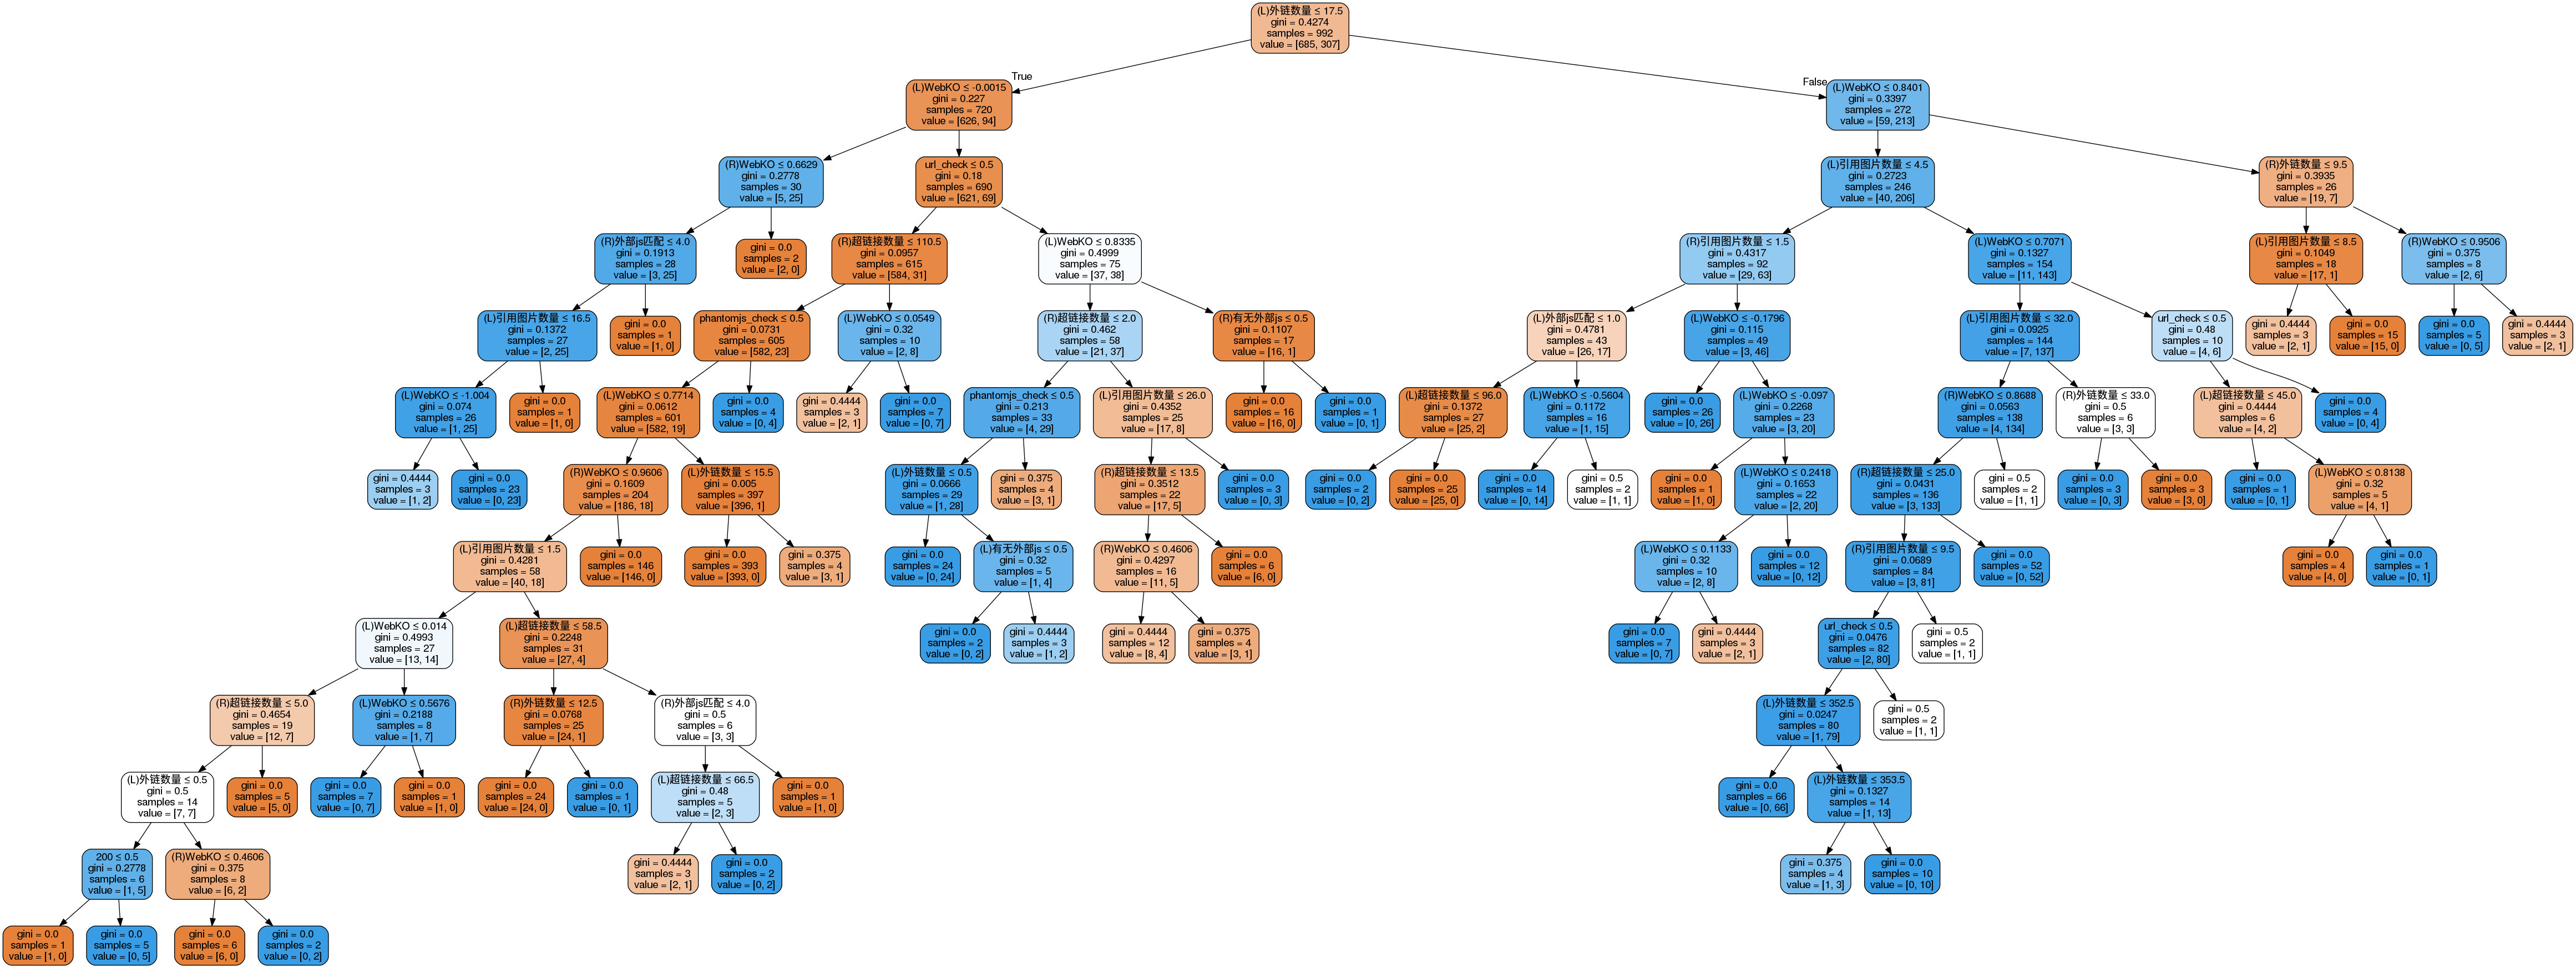

In [77]:
# 可视化
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [78]:
print("↓↓↓↓ Test ↓↓↓↓")
test_accuracy = cross_val_score(clf, test_data, test_target, cv=10,scoring='accuracy')
test_recall = cross_val_score(clf, test_data, test_target, cv=10,scoring='recall')
test_precision = cross_val_score(clf, test_data, test_target, cv=10,scoring='precision')
test_f1 = cross_val_score(clf, test_data, test_target, cv=10,scoring='f1')
print("Test_Accuracy >> \n",test_accuracy)
print("Test_Recall >> \n",test_recall)
print("Test_Precision >> \n",test_precision)
print("Test_F1 >> \n",test_f1)

↓↓↓↓ Test ↓↓↓↓
Test_Accuracy >> 
 [ 0.92307692  0.84615385  0.84        0.68        0.84        0.92        0.84
  0.83333333  0.875       1.        ]
Test_Recall >> 
 [ 0.77777778  0.55555556  0.55555556  0.44444444  0.66666667  0.77777778
  0.77777778  0.875       0.875       1.        ]
Test_Precision >> 
 [ 1.          1.          1.          0.57142857  0.85714286  1.
  0.77777778  0.7         0.77777778  1.        ]
Test_F1 >> 
 [ 0.875       0.71428571  0.71428571  0.5         0.75        0.875
  0.77777778  0.77777778  0.82352941  1.        ]
